# House Cloud
 
This work presents an app construction that is rating DJ artists of electronic music events in SF (performing on a day of interest) according to their number of followers on SoundCloud, then presents top clubs where DJs with the highest rating are performing on this day. The work flow includes next steps:

* Collect the data from published venue of electronic music events in the Bay Area.
* Clean the date by parsing out columns with performing artists, hosting clubs and the events dates, times.
* Retrieve the date about artist's number of followers and published tracks from SoundCloud.com using collected list of artists from the published venue; merge with the venue data and sort in a descending order (all collected data is also exported to "output/current_venue_sorted_2.csv").
* Export to pgAdmin database.
* Build and app.py reading the pgAdmin database and presenting results on html pages where found artists are sorted in the descending order, according to their number of followers, and includes information about the hosting event/club, date and time. The app contains three available routes: all found venue; venue found for this month, and venue found for next month.

**** Due to COVID-19 published venue was significantly shorter than expected...


In [2]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import datetime as dt
from splinter import Browser
import pandas as pd


In [5]:
# URL of page to be scraped
url = 'https://19hz.info/eventlisting_BayArea.php'


In [12]:
tables = pd.read_html(url)
tables


[                                       Date/Time  \
 0    Fri: May 15-Sat: May 16 (Fri: 2pm-Sat: 2pm)   
 1    Fri: May 22-Mon: May 25 (Fri: 2pm-Mon: 2pm)   
 2                       Fri: May 22 (9pm-1:30am)   
 3                      Fri: May 22 (9pm-11:59pm)   
 4                         Fri: May 22 (10pm-3am)   
 ..                                           ...   
 112                            Sat: Oct 31 (9pm)   
 113                             Sun: Nov 1 (7pm)   
 114                      Fri: Nov 6 (9pm-3:30am)   
 115                            Sat: Nov 14 (9pm)   
 116                            Sat: Nov 21 (8pm)   
 
                                    Event Title @ Venue  \
 0    Set's Stay at Home Virtual Festival @ Livestre...   
 1    Dreamers Collective Campout #8 @ Minersville C...   
 2    FAF's Houseology *ing Dirtybird's 2Tails Keepi...   
 3                        NOTD @ Slim's (San Francisco)   
 4             Jason Ross @ 1015 Folsom (San Francisco)   
 ..     

In [13]:
type(tables)


list

In [14]:
df = tables[0]
df.head()
    

,Date/Time,Event Title @ Venue,Tags,Price | Age,Organizers,Links,Unnamed: 6
0,Fri: May 15-Sat: May 16 (Fri: 2pm-Sat: 2pm),Set's Stay at Home Virtual Festival @ Livestre...,"tech house, progressive house, deep house",NaN,NaN,Facebook Page,2020/05/15
1,Fri: May 22-Mon: May 25 (Fri: 2pm-Mon: 2pm),Dreamers Collective Campout #8 @ Minersville C...,multigenre festival,$50+ / <18 free | All ages,NaN,NaN,2020/05/22
2,Fri: May 22 (9pm-1:30am),FAF's Houseology *ing Dirtybird's 2Tails Keepi...,tech house,$10-15 pre/$20 | 21+,Faf Management,NaN,2020/05/22
3,Fri: May 22 (9pm-11:59pm),NOTD @ Slim's (San Francisco),pop EDM,$15 | All ages,NaN,NaN,2020/05/22
4,Fri: May 22 (10pm-3am),Jason Ross @ 1015 Folsom (San Francisco),"big room house, progressive house, trance",$15-20 | 21+,NaN,NaN,2020/05/22


In [15]:
len(df)
    

117

In [16]:
df1 = tables[1]
df1.head()


,Date/Time,Event Title @ Venue,Tags,Price | Age,Organizers,Links
0,Mondays (9pm),Moody Mondays w/D!ANA @ The Ruby Room (Oakland),various,21+,NaN,NaN
1,Mondays (9:30pm-3am),Death Guild @ DNA Lounge (San Francisco),"goth, industrial, synthpop, noise, ambient",$3 b4 10pm/$5 pre | 18+,Death Guild,Event Link
2,Tuesdays (5pm),Nice Timing @ Phonobar (San Francisco),"house, techno",21+,R. Fentz,NaN
3,Tuesdays (9pm-1am),The Get Down @ Swig (San Francisco),"soul, funk, disco",Free | 21+,NaN,NaN
4,Tuesdays (9pm-1:30am),"Rhythm Ritual w/Arturo Garces, Eddie House, & ...",house,Free | 21+,Rhythm Ritual,NaN


In [17]:
len(df1)


66

In [18]:
event_artist = df["Event Title @ Venue"].str.split("@", n = 1, expand = True) 
event_artist



,0,1
0,Set's Stay at Home Virtual Festival,Livestream (Online)
1,Dreamers Collective Campout #8,Minersville Campground (Trinity Center)
2,FAF's Houseology *ing Dirtybird's 2Tails Keepi...,Brasserie Capitale (Sacramento)
3,NOTD,Slim's (San Francisco)
4,Jason Ross,1015 Folsom (San Francisco)
...,...,...
112,Dan Deacon,The Fillmore (San Francisco)
113,Dan Deacon,Harlow's (Sacramento)
114,Bedouin & Einmusik,Public Works (San Francisco)
115,"Jvna, Slumberjack",The Regency Ballroom (San Francisco)


In [19]:
event_artist = event_artist.rename(columns={0:"Artist", 1:"Event"})
event_artist


,Artist,Event
0,Set's Stay at Home Virtual Festival,Livestream (Online)
1,Dreamers Collective Campout #8,Minersville Campground (Trinity Center)
2,FAF's Houseology *ing Dirtybird's 2Tails Keepi...,Brasserie Capitale (Sacramento)
3,NOTD,Slim's (San Francisco)
4,Jason Ross,1015 Folsom (San Francisco)
...,...,...
112,Dan Deacon,The Fillmore (San Francisco)
113,Dan Deacon,Harlow's (Sacramento)
114,Bedouin & Einmusik,Public Works (San Francisco)
115,"Jvna, Slumberjack",The Regency Ballroom (San Francisco)


In [20]:
event_city = event_artist["Event"].str.split("(", n = 1, expand = True) 
event_city.head()


,0,1
0,Livestream,Online)
1,Minersville Campground,Trinity Center)
2,Brasserie Capitale,Sacramento)
3,Slim's,San Francisco)
4,1015 Folsom,San Francisco)


In [21]:
event_city = event_city.rename(columns={0:"Event", 1:"City"})
event_city.head()


,Event,City
0,Livestream,Online)
1,Minersville Campground,Trinity Center)
2,Brasserie Capitale,Sacramento)
3,Slim's,San Francisco)
4,1015 Folsom,San Francisco)


In [22]:
city = event_city["City"].str.split(")", n = 1, expand = True)
city.head()

,0,1
0,Online,
1,Trinity Center,
2,Sacramento,
3,San Francisco,
4,San Francisco,


In [23]:
city = city.rename(columns={0:"City"})
city_cl = city["City"]
city_cl

0              Online
1      Trinity Center
2          Sacramento
3       San Francisco
4       San Francisco
            ...      
112     San Francisco
113        Sacramento
114     San Francisco
115     San Francisco
116     San Francisco
Name: City, Length: 117, dtype: object

In [24]:
event_artist['event_cl'] = event_city['Event']
event_artist.head()


,Artist,Event,event_cl
0,Set's Stay at Home Virtual Festival,Livestream (Online),Livestream
1,Dreamers Collective Campout #8,Minersville Campground (Trinity Center),Minersville Campground
2,FAF's Houseology *ing Dirtybird's 2Tails Keepi...,Brasserie Capitale (Sacramento),Brasserie Capitale
3,NOTD,Slim's (San Francisco),Slim's
4,Jason Ross,1015 Folsom (San Francisco),1015 Folsom


In [25]:
del event_artist['Event']
event_artist.head()


,Artist,event_cl
0,Set's Stay at Home Virtual Festival,Livestream
1,Dreamers Collective Campout #8,Minersville Campground
2,FAF's Houseology *ing Dirtybird's 2Tails Keepi...,Brasserie Capitale
3,NOTD,Slim's
4,Jason Ross,1015 Folsom


In [26]:
event_artist = event_artist.rename(columns={"event_cl":"Club"})
event_artist.head()


,Artist,Club
0,Set's Stay at Home Virtual Festival,Livestream
1,Dreamers Collective Campout #8,Minersville Campground
2,FAF's Houseology *ing Dirtybird's 2Tails Keepi...,Brasserie Capitale
3,NOTD,Slim's
4,Jason Ross,1015 Folsom


In [27]:
event_artist["City"] = city_cl
event_artist.head()

,Artist,Club,City
0,Set's Stay at Home Virtual Festival,Livestream,Online
1,Dreamers Collective Campout #8,Minersville Campground,Trinity Center
2,FAF's Houseology *ing Dirtybird's 2Tails Keepi...,Brasserie Capitale,Sacramento
3,NOTD,Slim's,San Francisco
4,Jason Ross,1015 Folsom,San Francisco


In [31]:
date_time = df["Date/Time"].str.split(":", n = 1, expand = True)
date_time


,0,1
0,Fri,May 15-Sat: May 16 (Fri: 2pm-Sat: 2pm)
1,Fri,May 22-Mon: May 25 (Fri: 2pm-Mon: 2pm)
2,Fri,May 22 (9pm-1:30am)
3,Fri,May 22 (9pm-11:59pm)
4,Fri,May 22 (10pm-3am)
...,...,...
112,Sat,Oct 31 (9pm)
113,Sun,Nov 1 (7pm)
114,Fri,Nov 6 (9pm-3:30am)
115,Sat,Nov 14 (9pm)


In [44]:
date_time = date_time.rename(columns={1:"Date-time"})
date_time.head()

,0,Date-time
0,Fri,May 15-Sat: May 16 (Fri: 2pm-Sat: 2pm)
1,Fri,May 22-Mon: May 25 (Fri: 2pm-Mon: 2pm)
2,Fri,May 22 (9pm-1:30am)
3,Fri,May 22 (9pm-11:59pm)
4,Fri,May 22 (10pm-3am)


In [45]:
date_time_cl = date_time["Date-time"].str.split("(", n = 1, expand = True)
date_time_cl = date_time_cl.rename(columns={0:"Date", 1:"Time_dir"})
date_time_cl.head()


,Date,Time_dir
0,May 15-Sat: May 16,Fri: 2pm-Sat: 2pm)
1,May 22-Mon: May 25,Fri: 2pm-Mon: 2pm)
2,May 22,9pm-1:30am)
3,May 22,9pm-11:59pm)
4,May 22,10pm-3am)


In [48]:
time = date_time_cl["Time_dir"].str.split(")", n = 1, expand = True)
time = time.rename(columns={0:"Time"})
time.head()


,Time,1
0,Fri: 2pm-Sat: 2pm,
1,Fri: 2pm-Mon: 2pm,
2,9pm-1:30am,
3,9pm-11:59pm,
4,10pm-3am,


In [49]:
date_time_cl["Time"] = time["Time"]
del date_time_cl['Time_dir']

date_time_cl

,Date,Time
0,May 15-Sat: May 16,Fri: 2pm-Sat: 2pm
1,May 22-Mon: May 25,Fri: 2pm-Mon: 2pm
2,May 22,9pm-1:30am
3,May 22,9pm-11:59pm
4,May 22,10pm-3am
...,...,...
112,Oct 31,9pm
113,Nov 1,7pm
114,Nov 6,9pm-3:30am
115,Nov 14,9pm


In [50]:
event_artist["Date"] = date_time_cl["Date"]
event_artist["Time"] = date_time_cl["Time"]
event_artist.head(20)


,Artist,Club,City,Date,Time
0,Set's Stay at Home Virtual Festival,Livestream,Online,May 15-Sat: May 16,Fri: 2pm-Sat: 2pm
1,Dreamers Collective Campout #8,Minersville Campground,Trinity Center,May 22-Mon: May 25,Fri: 2pm-Mon: 2pm
2,FAF's Houseology *ing Dirtybird's 2Tails Keepi...,Brasserie Capitale,Sacramento,May 22,9pm-1:30am
3,NOTD,Slim's,San Francisco,May 22,9pm-11:59pm
4,Jason Ross,1015 Folsom,San Francisco,May 22,10pm-3am
5,Odd One Outside w/ Yotto,The San Francisco Mint,San Francisco,May 23,2pm-8pm
6,Digitalism,The Independent,San Francisco,May 23,9pm
7,Ext After-Hours - The Experience Weekend Offic...,Oasis,San Francisco,May 24,2am-8am
8,Stormzy,Fox Theater,Oakland,May 26,8pm
9,The Untz Festival 2020,Sycamore Ranch,Browns Valley,May 29-Mon: Jun 1,Fri: 4pm-Mon: 7am


In [51]:
len(event_artist)


117

In [62]:
event_artist.to_csv("output/event_artist_current.csv")


In [2]:
current_venue = pd.read_csv("output/event_artist_current.csv")
current_venue.head()


,Unnamed: 0,Artist,Club,City,Date,Time
0,0,Set's Stay at Home Virtual Festival,Livestream,Online,May 15-Sat: May 16,Fri: 2pm-Sat: 2pm
1,1,Dreamers Collective Campout #8,Minersville Campground,Trinity Center,May 22-Mon: May 25,Fri: 2pm-Mon: 2pm
2,2,FAF's Houseology *ing Dirtybird's 2Tails Keepi...,Brasserie Capitale,Sacramento,May 22,9pm-1:30am
3,3,NOTD,Slim's,San Francisco,May 22,9pm-11:59pm
4,4,Jason Ross,1015 Folsom,San Francisco,May 22,10pm-3am


In [3]:
del current_venue["Unnamed: 0"]
current_venue.head()


,Artist,Club,City,Date,Time
0,Set's Stay at Home Virtual Festival,Livestream,Online,May 15-Sat: May 16,Fri: 2pm-Sat: 2pm
1,Dreamers Collective Campout #8,Minersville Campground,Trinity Center,May 22-Mon: May 25,Fri: 2pm-Mon: 2pm
2,FAF's Houseology *ing Dirtybird's 2Tails Keepi...,Brasserie Capitale,Sacramento,May 22,9pm-1:30am
3,NOTD,Slim's,San Francisco,May 22,9pm-11:59pm
4,Jason Ross,1015 Folsom,San Francisco,May 22,10pm-3am


In [4]:
artists  = current_venue['Artist'].to_list()


In [5]:
len(artists)


117

In [6]:
# Windows Users or Mac users
import os
if os.name=="nt":
    executable_path = {'executable_path': './chromedriver.exe'}
else:
    executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
    

In [7]:
browser = Browser('chrome', **executable_path, headless=True)


In [8]:
sec=10
user_wait_time = round(sec*len(artists)/60)
user_wait_time


20

In [21]:
artist = artists[34]
print(artist)


Tiesto 


In [22]:
#test url
url = f'http://soundcloud.com/search?q={artist}'
browser.visit(url)

In [23]:
import time

time.sleep(sec)
    
response = browser.html
soup = BeautifulSoup(response, 'html.parser')

info = soup.find_all('li', class_="sc-ministats-item")
# print(info[0])
# print(info[1])

# extract string info about the number of followers and tracks, except zero_results_found pages
try:
    f_string = info[0].get_text()
    t_string = info[1].get_text()
except IndexError:
    f_string = 'artist_not_found'
    t_string = 'artist_not_found'

#remove 'string' around string
f_string = f_string.replace("'","")
t_string = t_string.replace("'","")

#split string into two items
f_string_spl = f_string.split(" ")
t_string_spl = t_string.split(" ")

#take the firts item from splitted string and convert to integer, except non_numerical values
try:
    follower = int(f_string_spl[0].replace(",",""))
    track = int(t_string_spl[0].replace(",",""))
except ValueError:
    follower = 0
    track = 0

#append integer results into lists   
#     followers.append(follower)
#     tracks.append(track)
    
print ("--"*30)
print(f"found {follower} followers and {track} tracks for {artist}")
    

------------------------------------------------------------
found 1871348 followers and 822 tracks for Tiesto 


In [24]:

followers = []
tracks = []

print("Starting data retrieval")
print(f"Please take a break for {user_wait_time} minutes")
print("--"*50)

for artist in artists:

    url = f'http://soundcloud.com/search?q={artist}'
    browser.visit(url)
    
#wait # of seconds to allow the url to upload
    time.sleep(sec)
    
    response = browser.html
    soup = BeautifulSoup(response, 'html.parser')
    
# find string info about the number of followers and tracks on html
    info = soup.find_all('li', class_="sc-ministats-item")
    
# extract string info about the number of followers and tracks, except zero_results_found pages
    try:
        f_string = info[0].get_text()
        t_string = info[1].get_text()
    except IndexError:
        f_string = 'artist_not_found'
        t_string = 'artist_not_found'

#remove 'string' around string
    f_string = f_string.replace("'","")
    t_string = t_string.replace("'","")

#split string into two items
    f_string_spl = f_string.split(" ")
    t_string_spl = t_string.split(" ")

#take the firts item from splitted string and convert to integer, except non_numerical values
    try:
        follower = int(f_string_spl[0].replace(",",""))
        track = int(t_string_spl[0].replace(",",""))
    except ValueError:
        follower = 0
        track = 0

#append integer results into lists   
    followers.append(follower)
    tracks.append(track)
    
    print ("--"*30)
    print(f"found {follower} followers and {track} tracks for {artist}")
    
print ("--"*50)
print ("Search complete!")


Starting data retrieval
Please take a break for 20 minutes
----------------------------------------------------------------------------------------------------
------------------------------------------------------------
found 0 followers and 0 tracks for Set's Stay at Home Virtual Festival 
------------------------------------------------------------
found 0 followers and 0 tracks for Dreamers Collective Campout #8 
------------------------------------------------------------
found 0 followers and 0 tracks for FAF's Houseology *ing Dirtybird's 2Tails Keeping You Alive Tour 
------------------------------------------------------------
found 16189 followers and 33 tracks for NOTD 
------------------------------------------------------------
found 24391 followers and 97 tracks for Jason Ross 
------------------------------------------------------------
found 0 followers and 0 tracks for Odd One Outside w/ Yotto 
------------------------------------------------------------
found 360904 fo

------------------------------------------------------------
found 0 followers and 0 tracks for Sequence: Gentlemens Club + Dirtysnatcha 
------------------------------------------------------------
found 0 followers and 0 tracks for Star Camp Shasta 2020 
------------------------------------------------------------
found 0 followers and 0 tracks for Cazzette 
------------------------------------------------------------
found 653 followers and 40 tracks for Pizza and Techno 
------------------------------------------------------------
found 0 followers and 0 tracks for Sunday Bliss 5yr Anniversary w/ Seven Davis Jr. 
------------------------------------------------------------
found 10737 followers and 7566 tracks for Outside Lands 2020 
------------------------------------------------------------
found 0 followers and 0 tracks for Some Are Camp 2020 - The World 
------------------------------------------------------------
found 0 followers and 0 tracks for Phantoms (DJ Set) 
---------

In [25]:
len(followers)

117

In [26]:
len(tracks)


117

In [27]:
current_venue["Followers"] = followers
current_venue["Tracks"] = tracks
current_venue

,Artist,Club,City,Date,Time,Followers,Tracks
0,Set's Stay at Home Virtual Festival,Livestream,Online,May 15-Sat: May 16,Fri: 2pm-Sat: 2pm,0,0
1,Dreamers Collective Campout #8,Minersville Campground,Trinity Center,May 22-Mon: May 25,Fri: 2pm-Mon: 2pm,0,0
2,FAF's Houseology *ing Dirtybird's 2Tails Keepi...,Brasserie Capitale,Sacramento,May 22,9pm-1:30am,0,0
3,NOTD,Slim's,San Francisco,May 22,9pm-11:59pm,16189,33
4,Jason Ross,1015 Folsom,San Francisco,May 22,10pm-3am,24391,97
...,...,...,...,...,...,...,...
112,Dan Deacon,The Fillmore,San Francisco,Oct 31,9pm,15433,173
113,Dan Deacon,Harlow's,Sacramento,Nov 1,7pm,15433,173
114,Bedouin & Einmusik,Public Works,San Francisco,Nov 6,9pm-3:30am,72062,16
115,"Jvna, Slumberjack",The Regency Ballroom,San Francisco,Nov 14,9pm,0,0


In [28]:
current_venue_sorted = current_venue.sort_values(["Followers"], ascending=False)
current_venue_sorted.reset_index(inplace=True, drop=True)
current_venue_sorted


,Artist,Club,City,Date,Time,Followers,Tracks
0,Tiesto,1015 Folsom,San Francisco,Jun 19,10pm-3am,1871347,822
1,Marshmello Presents Joytime: Into The Mellover...,Bill Graham Civic Auditorium,San Francisco,Sep 29,7pm,1280479,118
2,San Holo,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458188,134
3,Robin Schulz,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,429822,217
4,Digitalism,The Independent,San Francisco,May 23,9pm,360904,226
...,...,...,...,...,...,...,...
112,Ghostdragon w/ Dyln,Cornerstone,Berkeley,Jul 25,7pm-12am,0,0
113,Dreamers Collective Campout #8,Minersville Campground,Trinity Center,May 22-Mon: May 25,Fri: 2pm-Mon: 2pm,0,0
114,Sunset Campout 2020,Belden Town,Belden,Jul 24-Mon: Jul 27,Fri: 12pm-Mon: 9am,0,0
115,Safra | Permission To Land w/ Facundo Mohrr an...,The Midway,San Francisco,Jul 19,2pm-9pm,0,0


In [29]:
current_venue_sorted.to_csv("output/current_venue_sorted_1.csv")


In [4]:
current_venue_out = pd.read_csv("output/current_venue_sorted_2.csv")
current_venue_out.head()


,Unnamed: 0,Artist,Club,City,Date,Time,Followers,Tracks
0,0,Tiesto,1015 Folsom,San Francisco,Jun 19,10pm-3am,1871347,822
1,1,Marshmello Presents Joytime: Into The Mellover...,Bill Graham Civic Auditorium,San Francisco,Sep 29,7pm,1280479,118
2,2,San Holo,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458188,134
3,3,Robin Schulz,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,429822,217
4,4,Digitalism,The Independent,San Francisco,May 23,9pm,360904,226


In [5]:
del current_venue_out["Unnamed: 0"]
current_venue_out


,Artist,Club,City,Date,Time,Followers,Tracks
0,Tiesto,1015 Folsom,San Francisco,Jun 19,10pm-3am,1871347,822
1,Marshmello Presents Joytime: Into The Mellover...,Bill Graham Civic Auditorium,San Francisco,Sep 29,7pm,1280479,118
2,San Holo,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458188,134
3,Robin Schulz,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,429822,217
4,Digitalism,The Independent,San Francisco,May 23,9pm,360904,226
...,...,...,...,...,...,...,...
112,Ghostdragon w/ Dyln,Cornerstone,Berkeley,Jul 25,7pm-12am,0,0
113,Dreamers Collective Campout #8,Minersville Campground,Trinity Center,May 22-Mon: May 25,Fri: 2pm-Mon: 2pm,0,0
114,Sunset Campout 2020,Belden Town,Belden,Jul 24-Mon: Jul 27,Fri: 12pm-Mon: 9am,0,0
115,Safra | Permission To Land w/ Facundo Mohrr an...,The Midway,San Francisco,Jul 19,2pm-9pm,0,0


In [6]:
len(current_venue_out)


117

In [7]:
current_top_20 = current_venue_out.iloc[0:20, :]
current_top_20


,Artist,Club,City,Date,Time,Followers,Tracks
0,Tiesto,1015 Folsom,San Francisco,Jun 19,10pm-3am,1871347,822
1,Marshmello Presents Joytime: Into The Mellover...,Bill Graham Civic Auditorium,San Francisco,Sep 29,7pm,1280479,118
2,San Holo,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458188,134
3,Robin Schulz,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,429822,217
4,Digitalism,The Independent,San Francisco,May 23,9pm,360904,226
5,Slander,Bill Graham Civic Auditorium,San Francisco,Oct 30,8pm,357115,57
6,Snakehips,1015 Folsom,San Francisco,Oct 15,9pm-2am,312553,110
7,Audien,Park Ultra Lounge,Sacramento,Jun 5,9pm-2am,179511,96
8,Mat Zo,Audio,San Francisco,Aug 21,9:30pm-2:30am,174978,261
9,Dubfire,Audio,San Francisco,Jul 6,9:30pm-2am,171712,59


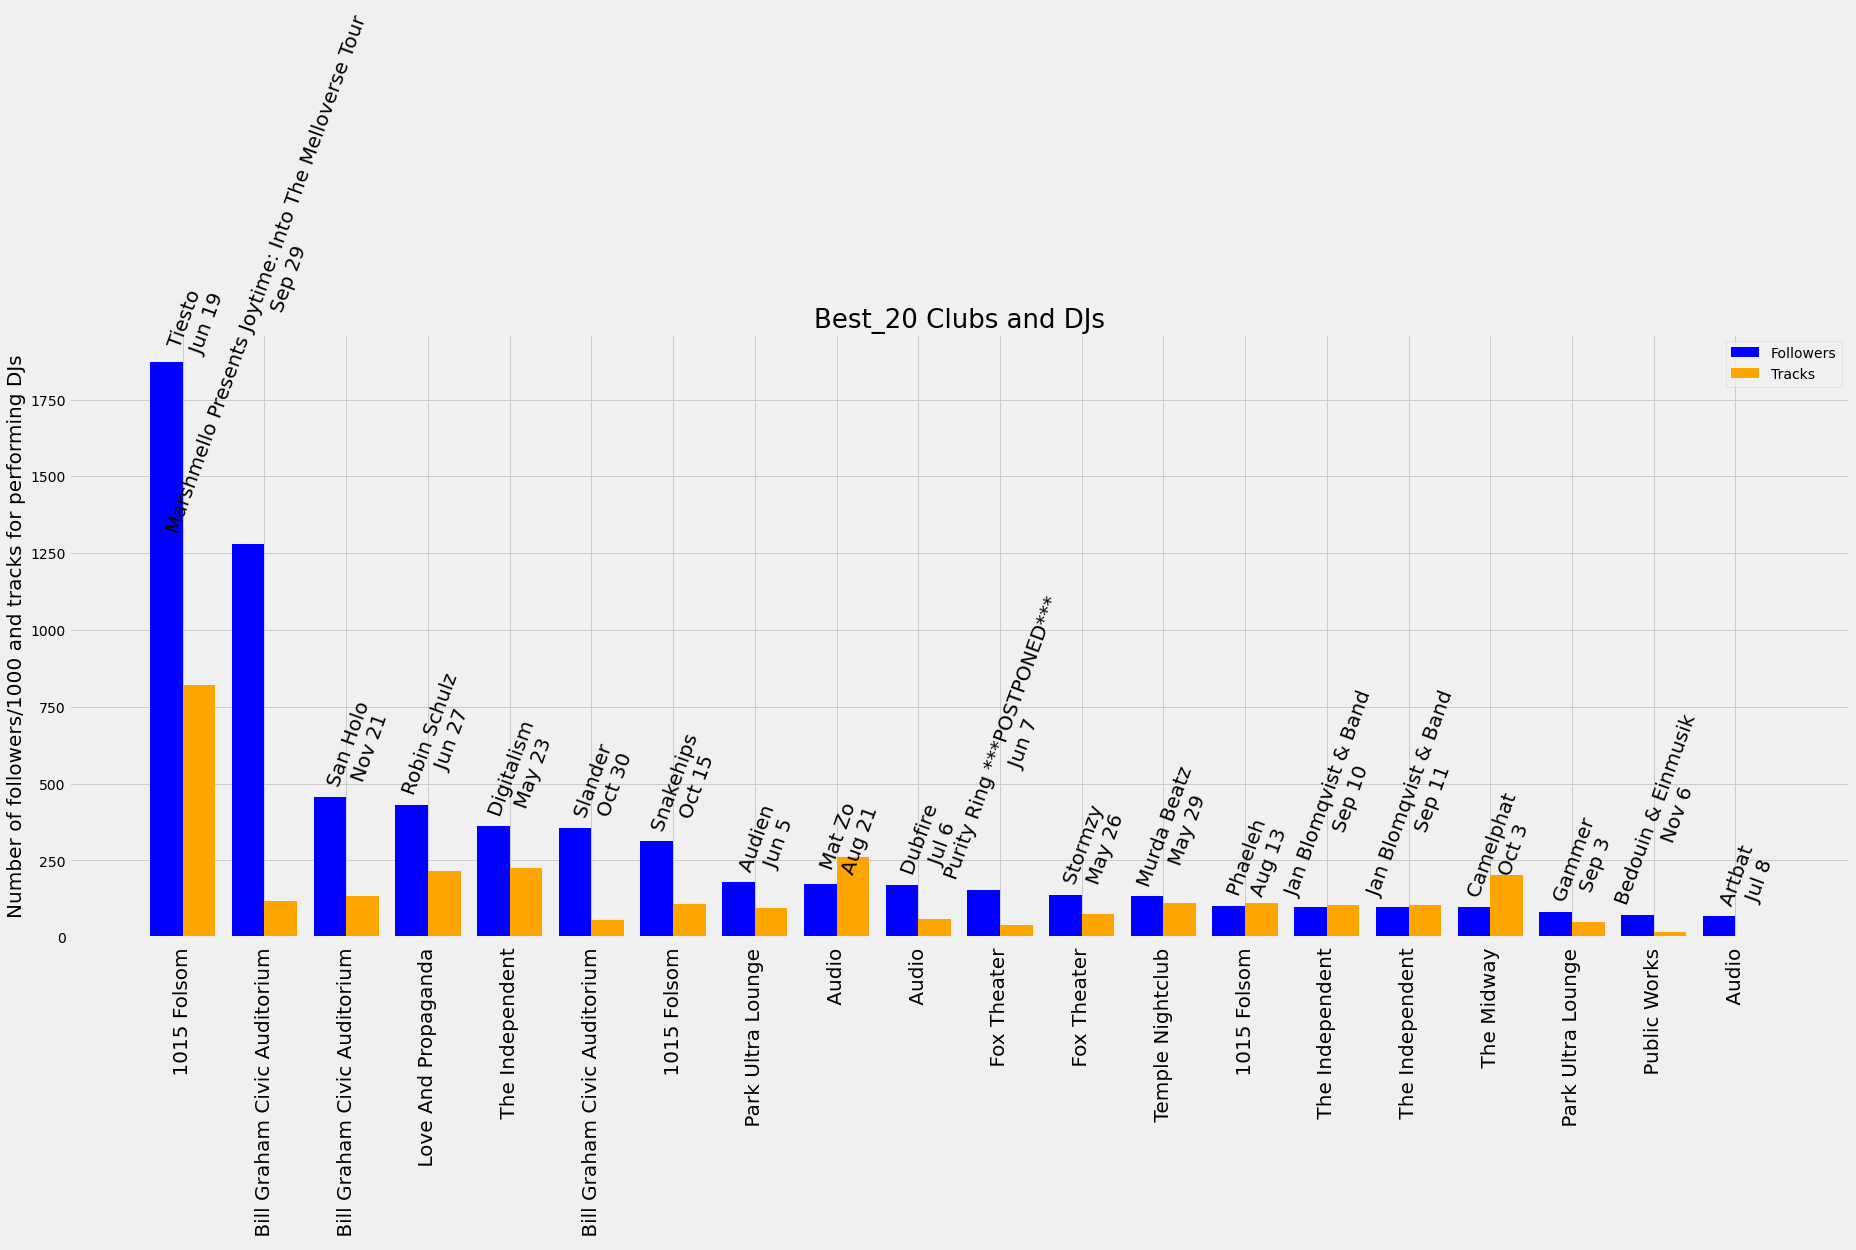

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

N = 20
ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig = plt.figure(figsize=(26,16))
ax = fig.add_subplot(111)

followers_vals = (current_top_20["Followers"])/1e3
rects1 = ax.bar(ind-width/2, followers_vals, width, color='blue')
tracks_vals = current_top_20["Tracks"]
rects2 = ax.bar(ind+width/2, tracks_vals, width, color='orange')

ax.set_title('Best_20 Clubs and DJs', fontsize=26)
ax.set_ylabel('Number of followers/1000 and tracks for performing DJs', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels( (current_top_20["Club"]), rotation=90, fontsize=20 )
ax.legend( (rects1[0], rects2[0]), ('Followers', 'Tracks') )

artists = current_top_20["Artist"]
dates = current_top_20["Date"]

# Make some labels.
labels1 = artists
labels2 = dates
labels = labels1 + "\n" +labels2

def autolabel(rects, labels):
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 0.7, height + 2, label,
                ha='center', va='bottom', rotation=70, fontsize=20)

autolabel(rects1, labels)
#autolabel(rects2, labels2)

plt.tight_layout()

fig_name = "hot_clubs"
plt.savefig(f"output/{fig_name}.png")


In [6]:
zoom_f = 2
current_top_20_zoomed = current_venue_out.iloc[zoom_f:20+zoom_f, :]
current_top_20_zoomed


,Artist,Club,City,Date,Time,Followers,Tracks
2,San Holo,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458188,134
3,Robin Schulz,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,429822,217
4,Digitalism,The Independent,San Francisco,May 23,9pm,360904,226
5,Slander,Bill Graham Civic Auditorium,San Francisco,Oct 30,8pm,357115,57
6,Snakehips,1015 Folsom,San Francisco,Oct 15,9pm-2am,312553,110
7,Audien,Park Ultra Lounge,Sacramento,Jun 5,9pm-2am,179511,96
8,Mat Zo,Audio,San Francisco,Aug 21,9:30pm-2:30am,174978,261
9,Dubfire,Audio,San Francisco,Jul 6,9:30pm-2am,171712,59
10,Purity Ring ***POSTPONED***,Fox Theater,Oakland,Jun 7,7:30pm,154107,40
11,Stormzy,Fox Theater,Oakland,May 26,8pm,138086,75


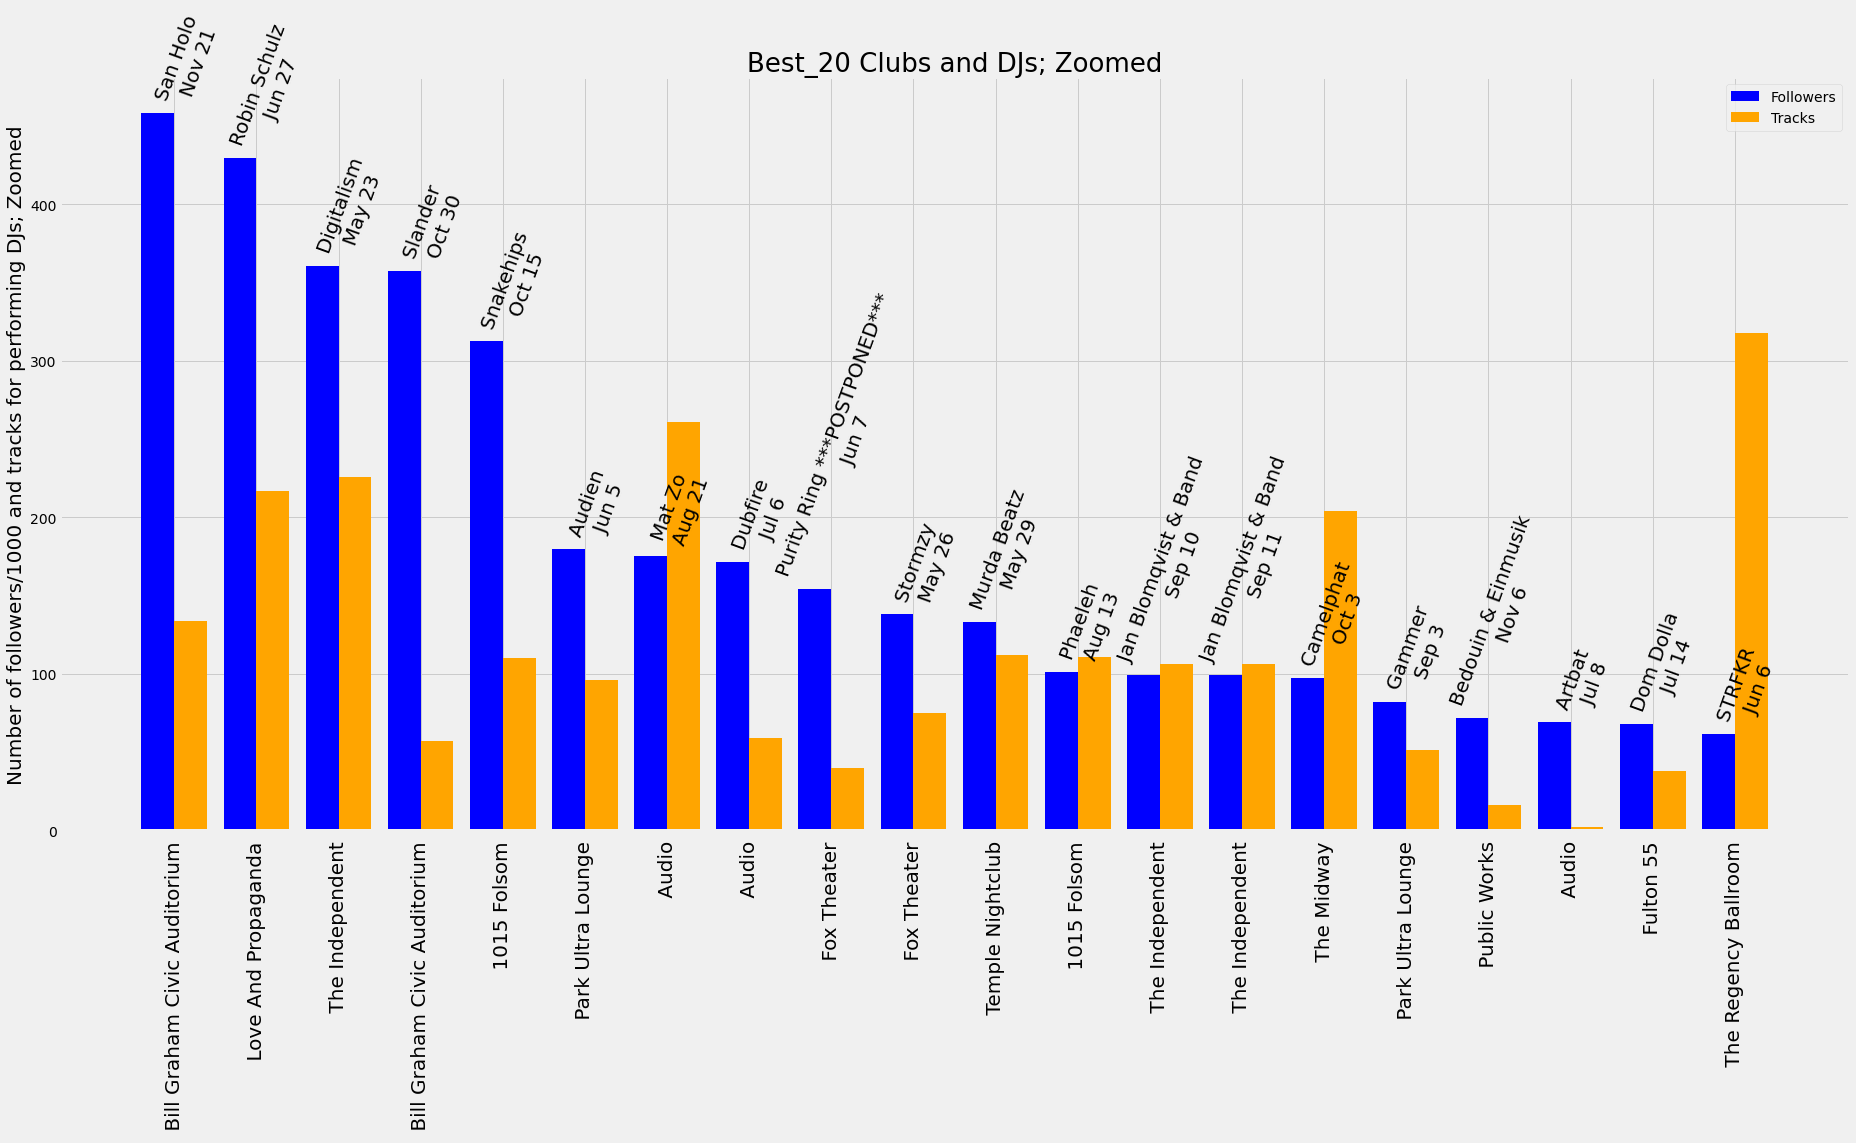

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

N = 20
ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig = plt.figure(figsize=(26,16))
ax = fig.add_subplot(111)

followers_vals = (current_top_20_zoomed["Followers"])/1e3
rects1 = ax.bar(ind-width/2, followers_vals, width, color='blue')
tracks_vals = current_top_20_zoomed["Tracks"]
rects2 = ax.bar(ind+width/2, tracks_vals, width, color='orange')

ax.set_title('Best_20 Clubs and DJs; Zoomed', fontsize=26)
ax.set_ylabel('Number of followers/1000 and tracks for performing DJs; Zoomed', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels( (current_top_20_zoomed["Club"]), rotation=90, fontsize=20 )
ax.legend( (rects1[0], rects2[0]), ('Followers', 'Tracks') )

artists = current_top_20_zoomed["Artist"]
dates = current_top_20_zoomed["Date"]

# Make some labels.
labels1 = artists
labels2 = dates
labels = labels1 + "\n" +labels2

def autolabel(rects, labels):
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 0.7, height + 2, label,
                ha='center', va='bottom', rotation=70, fontsize=20)

autolabel(rects1, labels)
#autolabel(rects2, labels2)

plt.tight_layout()

fig_name = "hot_clubs_zoomed"
plt.savefig(f"output/{fig_name}.png")


In [8]:
current_venue_out.tail()


,Artist,Club,City,Date,Time,Followers,Tracks
112,Ghostdragon w/ Dyln,Cornerstone,Berkeley,Jul 25,7pm-12am,0,0
113,Dreamers Collective Campout #8,Minersville Campground,Trinity Center,May 22-Mon: May 25,Fri: 2pm-Mon: 2pm,0,0
114,Sunset Campout 2020,Belden Town,Belden,Jul 24-Mon: Jul 27,Fri: 12pm-Mon: 9am,0,0
115,Safra | Permission To Land w/ Facundo Mohrr an...,The Midway,San Francisco,Jul 19,2pm-9pm,0,0
116,Set's Stay at Home Virtual Festival,Livestream,Online,May 15-Sat: May 16,Fri: 2pm-Sat: 2pm,0,0


In [9]:
current_venue_nz = current_venue_out.loc[(current_venue_out["Followers"]!=0)]
current_venue_nz = current_venue_nz.reset_index(drop=True)
current_venue_nz.tail()


,Artist,Club,City,Date,Time,Followers,Tracks
51,Ivardensphere and This Morn,Elbo Room Jack London,Oakland,Jun 6,9pm-1am,1225,153
52,Pizza and Techno,Audio Nightclub,San Francisco,Aug 1,1pm-8pm,653,40
53,Be Svendsen 'Man On The Run' Tour 2020,906 World Cultural Center,San Francisco,Oct 9,7pm-11pm,267,1404
54,"Goodie Mob: Cee-Lo Green, Big Gipp, Khujo & T-Mo",The New Parish,Oakland,Sep 27,9pm-11:30pm,41,7
55,Green Goddess 3,TBA,Sacramento,Jun 5-Sun: Jun 7,Fri: 3pm-Sun: 6pm,8,2313554


In [10]:
len(current_venue_nz)


56

In [11]:
dates = current_venue_nz["Date"].replace(" ","")
months_spl = []
months = []

for i in range(len(dates)):
    months_spl.append(dates[i].split(" "))
    months.append(str(months_spl[i][1]))

months[0]


'Jun'

In [12]:
type(months[0])


str

In [13]:
current_venue_nz["Month"]=months
current_venue_nz.head()


,Artist,Club,City,Date,Time,Followers,Tracks,Month
0,Tiesto,1015 Folsom,San Francisco,Jun 19,10pm-3am,1871347,822,Jun
1,Marshmello Presents Joytime: Into The Mellover...,Bill Graham Civic Auditorium,San Francisco,Sep 29,7pm,1280479,118,Sep
2,San Holo,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458188,134,Nov
3,Robin Schulz,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,429822,217,Jun
4,Digitalism,The Independent,San Francisco,May 23,9pm,360904,226,May


In [158]:
current_venue_nz.to_csv("output/venue_found.csv")


In [205]:
from sqlalchemy import create_engine


In [206]:
conn = "XXX:YYY@localhost:54XX/house_cloud"
engine = create_engine(f'postgresql://{conn}')


In [209]:
engine.table_names()



[]

In [211]:
current_venue_nz.to_sql(name='venue_found', con=engine, if_exists='append', index=True)


In [212]:
engine.table_names()


['venue_found']

In [17]:
current_venue_nz['Month'].value_counts()


Jun    13
Sep    12
Oct     9
Jul     7
Aug     6
May     6
Nov     3
Name: Month, dtype: int64

In [231]:
venue_found = pd.read_sql_query('select * from venue_found', con=engine)




In [250]:
artists = {}
for i in range(len(venue_found.Artist)):
    artists.update( {venue_found.Artist[i]: [venue_found.Club[i], venue_found.Followers[i],\
                                                venue_found.Tracks[i], venue_found.Date[i], venue_found.Time[i]]} )
artists                                                 

{'Tiesto ': [' 1015 Folsom ', 1871347, 822, ' Jun 19 ', '10pm-3am'],
 'Marshmello Presents Joytime: Into The Melloverse Tour ': [' Bill Graham Civic Auditorium ',
  1280479,
  118,
  ' Sep 29 ',
  '7pm'],
 'San Holo ': [' Bill Graham Civic Auditorium ',
  458188,
  134,
  ' Nov 21 ',
  '8pm'],
 'Robin Schulz ': [' Love And Propaganda ',
  429822,
  217,
  ' Jun 27 ',
  '9:30pm-2am'],
 'Digitalism ': [' The Independent ', 360904, 226, ' May 23 ', '9pm'],
 'Slander ': [' Bill Graham Civic Auditorium ', 357115, 57, ' Oct 30 ', '8pm'],
 'Snakehips ': [' 1015 Folsom ', 312553, 110, ' Oct 15 ', '9pm-2am'],
 'Audien ': [' Park Ultra Lounge ', 179511, 96, ' Jun 5 ', '9pm-2am'],
 'Mat Zo ': [' Audio ', 174978, 261, ' Aug 21 ', '9:30pm-2:30am'],
 'Dubfire ': [' Audio ', 171712, 59, ' Jul 6 ', '9:30pm-2am'],
 'Purity Ring ***POSTPONED*** ': [' Fox Theater ',
  154107,
  40,
  ' Jun 7 ',
  '7:30pm'],
 'Stormzy ': [' Fox Theater ', 138086, 75, ' May 26 ', '8pm'],
 'Murda Beatz ': [' Temple Nightclu

In [252]:
type(artists)

dict

In [262]:
#artists.values()
for artist in artists:
    print (artist, artists[artist])

Tiesto  [' 1015 Folsom ', 1871347, 822, ' Jun 19 ', '10pm-3am']
Marshmello Presents Joytime: Into The Melloverse Tour  [' Bill Graham Civic Auditorium ', 1280479, 118, ' Sep 29 ', '7pm']
San Holo  [' Bill Graham Civic Auditorium ', 458188, 134, ' Nov 21 ', '8pm']
Robin Schulz  [' Love And Propaganda ', 429822, 217, ' Jun 27 ', '9:30pm-2am']
Digitalism  [' The Independent ', 360904, 226, ' May 23 ', '9pm']
Slander  [' Bill Graham Civic Auditorium ', 357115, 57, ' Oct 30 ', '8pm']
Snakehips  [' 1015 Folsom ', 312553, 110, ' Oct 15 ', '9pm-2am']
Audien  [' Park Ultra Lounge ', 179511, 96, ' Jun 5 ', '9pm-2am']
Mat Zo  [' Audio ', 174978, 261, ' Aug 21 ', '9:30pm-2:30am']
Dubfire  [' Audio ', 171712, 59, ' Jul 6 ', '9:30pm-2am']
Purity Ring ***POSTPONED***  [' Fox Theater ', 154107, 40, ' Jun 7 ', '7:30pm']
Stormzy  [' Fox Theater ', 138086, 75, ' May 26 ', '8pm']
Murda Beatz  [' Temple Nightclub ', 132803, 112, ' May 29 ', '10pm-3am']
Phaeleh  [' 1015 Folsom ', 100880, 111, ' Aug 13 ', '8

In [246]:
may_venue = pd.read_sql_query('select * from may_venue', con=engine)
may_venue 


,Date,Artist,Club,City,Time,Followers,Tracks
0,May 23,Digitalism,The Independent,San Francisco,9pm,360904,226
1,May 26,Stormzy,Fox Theater,Oakland,8pm,138086,75
2,May 29,Murda Beatz,Temple Nightclub,San Francisco,10pm-3am,132803,112
3,May 22,Jason Ross,1015 Folsom,San Francisco,10pm-3am,24391,97
4,May 29,Shallou,Fox Theater,Oakland,8pm,22810,36
5,May 22,NOTD,Slim's,San Francisco,9pm-11:59pm,16189,33


In [221]:
jun_venue = pd.read_sql_query('select * from jun_venue', con=engine)
jun_venue.head()


,Date,Artist,Club,City,Time,Followers,Tracks
0,Jun 19,Tiesto,1015 Folsom,San Francisco,10pm-3am,1871347,822
1,Jun 27,Robin Schulz,Love And Propaganda,San Francisco,9:30pm-2am,429822,217
2,Jun 5,Audien,Park Ultra Lounge,Sacramento,9pm-2am,179511,96
3,Jun 7,Purity Ring ***POSTPONED***,Fox Theater,Oakland,7:30pm,154107,40
4,Jun 6,STRFKR,The Regency Ballroom,San Francisco,8pm,61393,318


In [222]:
jan_venue = pd.read_sql_query('select * from jan_venue', con=engine)
jan_venue


,Date,Artist,Club,City,Time,Followers,Tracks
